In [1]:
# Import the modules
import pandas as pd
import hvplot.pandas
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
# Read and output the csv
df_movies = pd.read_csv('../DataSets/movies_clean_V2.csv')
df_movies['Year'] = df_movies['Title'].str.extract(r'\((\d{4})\)')
df_movies['Title'] = df_movies['Title'].str.replace(r'\s\(\d{4}\)', '', regex=True)
df_movies.head()

,MovieID,Title,Genres_Western,Genres_War,Genres_Thriller,Genres_Sci-Fi,Genres_Romance,Genres_Mystery,Genres_Musical,Genres_Horror,...,Genres_Fantasy,Genres_Drama,Genres_Documentary,Genres_Crime,Genres_Comedy,Genres_Children's,Genres_Animation,Genres_Adventure,Genres_Action,Year
0,1,Toy Story,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1995
1,2,Jumanji,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1995
2,3,Grumpier Old Men,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1995
3,4,Waiting to Exhale,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1995
4,5,Father of the Bride Part II,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1995


In [3]:
# Read and output the csv
df_rating = pd.read_csv('../DataSets/ratings_clean.csv')
df_rating.head()

,UserID,MovieID,Rating,Timestamp
0,438,193,4,980904915
1,438,19,1,976258257
2,438,1013,3,981602900
3,438,1954,3,981602012
4,438,1017,3,981602575


In [4]:
# Read and output the csv
df_users = pd.read_csv('../DataSets/users_clean_V2.csv')

df_users.head()

,UserID,Gender,Age,Occupation
0,1,1,1,10
1,2,2,56,16
2,3,2,25,15
3,4,2,45,7
4,5,2,25,20


## Create a Data Base

In [5]:
from sqlalchemy import create_engine
import os

In [6]:
# Define the path
database_path = os.path.join('Resources', 'combined_movies_dataset.sqlite')

# Create a single SQLite database connection
engine = create_engine(f'sqlite:///{database_path}')

# Write each DataFrame to a separate table in the SQLite database
df_movies.to_sql('movies', engine, if_exists='replace', index=False)
df_rating.to_sql('ratings', engine, if_exists='replace', index=False)
df_users.to_sql('users', engine, if_exists='replace', index=False)


6040

In [75]:
# With our three data bases, perform a join
# Define the SQL query to join ratings, movies, and users
query = """
    SELECT 
        r.UserID,
        m.MovieID,
        m.Year,
        r.Rating,
        m.Genres_Western,
        m.Genres_War,
        m.Genres_Thriller,
        m."Genres_Sci-Fi",
        m.Genres_Romance,
        m.Genres_Mystery,
        m.Genres_Musical,
        m.Genres_Horror,
        m."Genres_Film-Noir",
        m.Genres_Fantasy,
        m.Genres_Drama,
        m.Genres_Documentary,
        m.Genres_Crime,
        m.Genres_Comedy,
        m."Genres_Children's",
        m.Genres_Animation,
        m.Genres_Adventure,
        m.Genres_Action
    FROM ratings r
    JOIN movies m ON r.MovieID = m.MovieID
    JOIN users u ON r.UserID = u.UserID
    WHERE m.Year is not NULL
"""

# Load the result into a pandas DataFrame
df_combined = pd.read_sql(query, engine)
df_combined.head()



,UserID,MovieID,Year,Rating,Genres_Western,Genres_War,Genres_Thriller,Genres_Sci-Fi,Genres_Romance,Genres_Mystery,...,Genres_Film-Noir,Genres_Fantasy,Genres_Drama,Genres_Documentary,Genres_Crime,Genres_Comedy,Genres_Children's,Genres_Animation,Genres_Adventure,Genres_Action
0,1,1,1995,5,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,6,1,1995,4,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,8,1,1995,4,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,9,1,1995,5,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,10,1,1995,5,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [100]:
# With our three data bases, perform a join
# Define the SQL query to join ratings, movies, and users
query = """
    SELECT 
        r.UserID,
        m.MovieID,
        u.Age,
        u.Gender,
        u.Occupation,
        m.Title
    FROM ratings r
    JOIN movies m ON r.MovieID = m.MovieID
    JOIN users u ON r.UserID = u.UserID
    WHERE m.Year is not NULL
"""

# Load the result into a pandas DataFrame
df_removed_info = pd.read_sql(query, engine)
df_removed_info.head()



,UserID,MovieID,Age,Gender,Occupation,Title
0,1,1,1,1,10,Toy Story
1,6,1,50,1,9,Toy Story
2,8,1,25,2,12,Toy Story
3,9,1,25,2,17,Toy Story
4,10,1,35,1,1,Toy Story


In [78]:
df_combined[df_combined['Year'].isnull()]

,,Year,Rating,Genres_Western,Genres_War,Genres_Thriller,Genres_Sci-Fi,Genres_Romance,Genres_Mystery,Genres_Musical,Genres_Horror,Genres_Film-Noir,Genres_Fantasy,Genres_Drama,Genres_Documentary,Genres_Crime,Genres_Comedy,Genres_Children's,Genres_Animation,Genres_Adventure,Genres_Action
UserID,MovieID,,,,,,,,,,,,,,,,,,,,
1,1,1995,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
6,1,1995,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
8,1,1995,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
9,1,1995,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
10,1,1995,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [77]:
df_combined.set_index(["UserID", "MovieID"], inplace=True)

In [79]:
df_combined.head()

,,Year,Rating,Genres_Western,Genres_War,Genres_Thriller,Genres_Sci-Fi,Genres_Romance,Genres_Mystery,Genres_Musical,Genres_Horror,Genres_Film-Noir,Genres_Fantasy,Genres_Drama,Genres_Documentary,Genres_Crime,Genres_Comedy,Genres_Children's,Genres_Animation,Genres_Adventure,Genres_Action
UserID,MovieID,,,,,,,,,,,,,,,,,,,,
1,1,1995,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
6,1,1995,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
8,1,1995,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
9,1,1995,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
10,1,1995,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [80]:
df_combined.to_csv("../df_ratings.csv")

In [81]:
# Number of entries
df_combined.shape


(936380, 20)

In [82]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, silhouette_score

In [83]:
# Create a list to store inertia values
inertia = []

# Create a list to store the values of k
k = range(2, 11)

In [84]:
# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the spread_df DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(df_combined)
    inertia.append(k_model.inertia_)

In [85]:
# Create a Dictionary that holds the list values for k and inertia
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame using the elbow_data Dictionary
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

,k,inertia
0,2,5.803211e+07
1,3,2.813572e+07
2,4,1.666713e+07
3,5,1.175202e+07
4,6,9.879777e+06


In [86]:
# Plot the DataFrame
df_elbow.hvplot.line(
    x="k",
    y="inertia",
    title="Elbow Curve",
    xticks=k
)

:Curve   [k]   (inertia)

In [88]:
# Use the same loop as above with your own data
k_values = range(2, 75)
scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df_combined)
    score = calinski_harabasz_score(df_combined, kmeans.labels_)
    scores.append(score)

In [89]:
# Select the best k based on the highest Calinski-Harabasz score
best_k = k_values[scores.index(max(scores))]
print(f"Best number of clusters (k) based on Calinski-Harabasz score: {best_k}")

Best number of clusters (k) based on Calinski-Harabasz score: 7


In [90]:
#Cluster with movie data
#Grouping

In [91]:
# Inference and Prediction with best K
kmeans = KMeans(n_clusters=best_k, random_state=0)
kmeans.fit(df_combined)

# Assign clusters to data
df_combined['cluster'] = kmeans.labels_

In [92]:
# Count the number of records in each cluster
cluster_counts = df_combined['cluster'].value_counts()
print("Record count per cluster:")
print(cluster_counts)

Record count per cluster:
cluster
1    245803
6    242622
4    172937
2    108328
5     72968
0     58740
3     34982
Name: count, dtype: int64


In [93]:
# Encode the clusters
df_combined['cluster'] = df_combined['cluster'].astype("category")

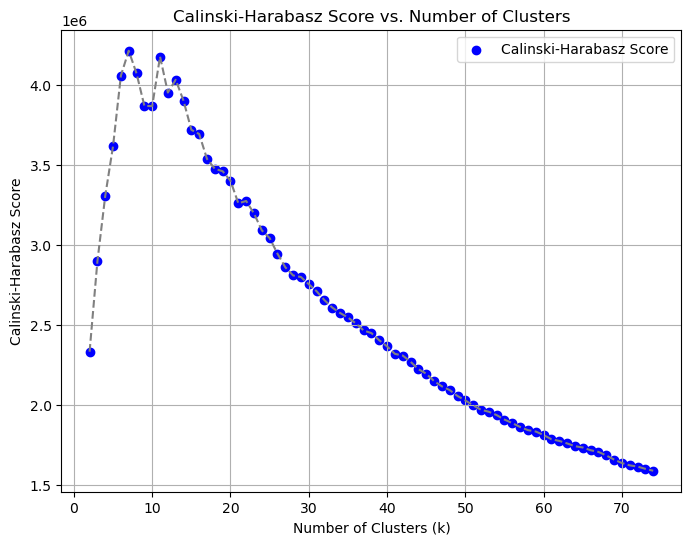

In [94]:
# Plot the Calinski-Harabasz scores
plt.figure(figsize=(8, 6))
plt.scatter(k_values, scores, color='blue', marker='o', label='Calinski-Harabasz Score')
plt.plot(k_values, scores, linestyle='--', color='gray')

# Add labels and title
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Score vs. Number of Clusters')
plt.grid(True)
plt.legend()
plt.show()

In [95]:
df_combined.head()

,,Year,Rating,Genres_Western,Genres_War,Genres_Thriller,Genres_Sci-Fi,Genres_Romance,Genres_Mystery,Genres_Musical,Genres_Horror,...,Genres_Fantasy,Genres_Drama,Genres_Documentary,Genres_Crime,Genres_Comedy,Genres_Children's,Genres_Animation,Genres_Adventure,Genres_Action,cluster
UserID,MovieID,,,,,,,,,,,,,,,,,,,,,
1,1,1995,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,6
6,1,1995,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,6
8,1,1995,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,6
9,1,1995,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,6
10,1,1995,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,6


In [98]:
#Add the classifying info
df_combined.reset_index()


,UserID,MovieID,Year,Rating,Genres_Western,Genres_War,Genres_Thriller,Genres_Sci-Fi,Genres_Romance,Genres_Mystery,...,Genres_Fantasy,Genres_Drama,Genres_Documentary,Genres_Crime,Genres_Comedy,Genres_Children's,Genres_Animation,Genres_Adventure,Genres_Action,cluster
0,1,1,1995,5,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,6
1,6,1,1995,4,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,6
2,8,1,1995,4,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,6
3,9,1,1995,5,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,6
4,10,1,1995,5,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936375,5812,3952,2000,4,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
936376,5831,3952,2000,3,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
936377,5837,3952,2000,4,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
936378,5927,3952,2000,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [102]:
df_final = df_combined.merge(df_removed_info, on=["UserID", "MovieID"], how="left")
df_final

,UserID,MovieID,Year,Rating,Genres_Western,Genres_War,Genres_Thriller,Genres_Sci-Fi,Genres_Romance,Genres_Mystery,...,Genres_Comedy,Genres_Children's,Genres_Animation,Genres_Adventure,Genres_Action,cluster,Age,Gender,Occupation,Title
0,1,1,1995,5,0,0,0,0,0,0,...,0,1,1,0,0,6,1,1,10,Toy Story
1,6,1,1995,4,0,0,0,0,0,0,...,0,1,1,0,0,6,50,1,9,Toy Story
2,8,1,1995,4,0,0,0,0,0,0,...,0,1,1,0,0,6,25,2,12,Toy Story
3,9,1,1995,5,0,0,0,0,0,0,...,0,1,1,0,0,6,25,2,17,Toy Story
4,10,1,1995,5,0,0,0,0,0,0,...,0,1,1,0,0,6,35,1,1,Toy Story
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936375,5812,3952,2000,4,0,0,1,0,0,0,...,0,0,0,0,0,1,25,1,7,"Contender, The"
936376,5831,3952,2000,3,0,0,1,0,0,0,...,0,0,0,0,0,1,25,2,1,"Contender, The"
936377,5837,3952,2000,4,0,0,1,0,0,0,...,0,0,0,0,0,1,25,2,7,"Contender, The"
936378,5927,3952,2000,1,0,0,1,0,0,0,...,0,0,0,0,0,1,35,2,14,"Contender, The"


In [103]:
df_final.to_csv("../df_ratings_cluster.csv")